In [1]:
import os, ast
import pandas as pd
import matplotlib.pyplot as plt

path_1 ='../timer/' 

Text(0.5, 1.0, 'Overview of the parallel efficiency with applied weak scaling')

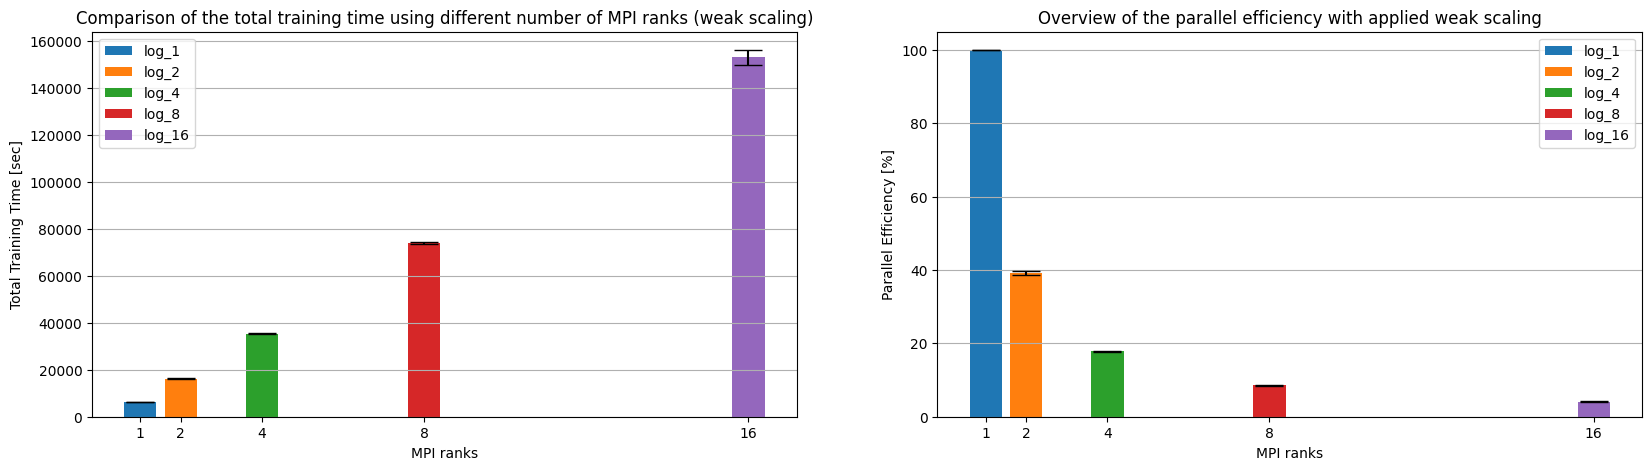

In [3]:
import numpy as np

names = sorted(os.listdir(path_1))

# read the base time from the timer files
base_times = []
for i in range(len(names)):
    parts = names[i].split("_")
    g = parts[1][1:]
    r = parts[2][1:]
    r = r[:1]
    if int(g) == 1:
        base = pd.read_csv(path_1+names[i], delimiter=',', header=0)
        base_time = base.training_time[0]
        base_times.append(base_time)

# read the configs from the timer files
configs = []
labels = {}
for i in range(len(names)):
    parts = names[i].split("_")
    mpi_ranks = parts[1][1:]
    mpi_ranks = int(mpi_ranks)
    label_name = "log_"+str(mpi_ranks)
    if len(configs) == 0:
        configs.append(mpi_ranks)
        labels[mpi_ranks] = label_name
    else:
        if mpi_ranks not in configs:
            configs.append(mpi_ranks)
        if label_name not in labels:
            labels[mpi_ranks] = label_name

# read runtime values form all other configs than serial version
runtimes = {}
for i in range(len(names)):
    parts = names[i].split("_")
    g = int(parts[1][1:])
    if g != 1:
        base = pd.read_csv(path_1+names[i], delimiter=',', header=0)
        base_time = base.training_time[0]

        if g in runtimes.keys():
            values = runtimes[g]
            values.append(base_time)
            runtimes[g] = values
        else:
            runtimes[g] = [base_time]

# calculate base mean time and std for error
base_mean = np.mean(base_times)
base_standard = np.std(base_times)

# calculate mean and error of the runtimes of remaining configs
mean_times = {}
std_times = {}
efficiencies = {}
#efficiencys.append(100)
for key, values in runtimes.items():
    runtime_mean = np.mean(values)
    runtime_std = np.std(values)
    mean_times[key] = runtime_mean
    std_times[key] = runtime_std
    eff = []
    for i in range(len(values)):
        efficiency = base_mean / values[i] * 100
        eff.append(efficiency)
    efficiencies[key] = eff

# calculate errors for efficiencies start
eff_err = {}
eff_err[1] = 0
eff = {}
eff[1] = 100
for key, values in efficiencies.items():
    efficiency_err = np.std(values)
    eff_err[key] = efficiency_err
    eff[key] = np.mean(values)

#times = []
#times.append(base_mean)
mean_times[1] = base_mean
#for i in range(len(mean_times)):
#    times.append(mean_times[i])

#time_error = []
#time_error.append(base_standard)
std_times[1] = base_standard
#for i in range(len(std_times)):
#    time_error.append(std_times[i])

configs = sorted(configs)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
for i in range(len(configs)):
   
    ax1.bar(configs[i], mean_times[configs[i]], yerr=std_times[configs[i]], label=labels[configs[i]], ecolor='black', capsize=10, width=0.8)
    ax2.bar(configs[i], eff[configs[i]], yerr=eff_err[configs[i]], label=labels[configs[i]], ecolor='black', capsize=10, width=0.8)

ax1.legend()
ax2.legend()

ax1.set_ylabel("Total Training Time [sec]")
ax2.set_ylabel("Parallel Efficiency [%]")

ax1.set_xlabel("MPI ranks")
ax2.set_xlabel("MPI ranks")

ax1.set_xticks(configs)
ax2.set_xticks(configs)

ax1.yaxis.grid(True)
ax2.yaxis.grid(True)

ax1.set_title("Comparison of the total training time using different number of MPI ranks (weak scaling)")
ax2.set_title("Overview of the parallel efficiency with applied weak scaling")